In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
wine = pd.read_csv(r"C:\Users\adars\Downloads\Wine_clust .csv")

In [3]:
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine.shape

(178, 13)

In [5]:
wine.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [7]:
columns = wine.columns

In [8]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
scaled_data = std.fit_transform(wine)
scaled_df = pd.DataFrame(scaled_data,columns= columns)

In [9]:
scaled_df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.122697e-17,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [11]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'Inertia')

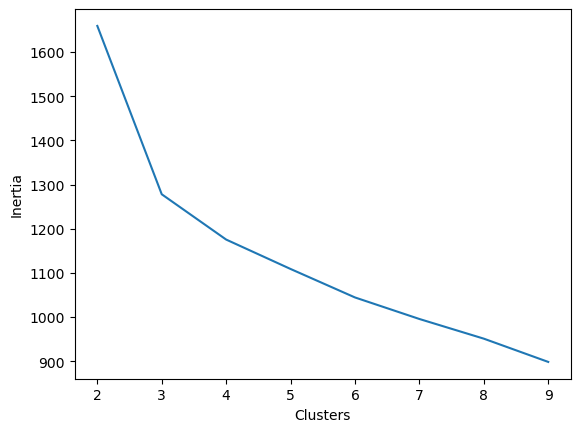

In [12]:
inertia = []
for i in range(2,10):
    kmean =KMeans(n_clusters= i, init= 'k-means++')
    kmean.fit(scaled_df)
    inertia.append(kmean.inertia_)
    
plt.plot(range(2,10), inertia)
plt.xlabel('Clusters')
plt.ylabel('Inertia')

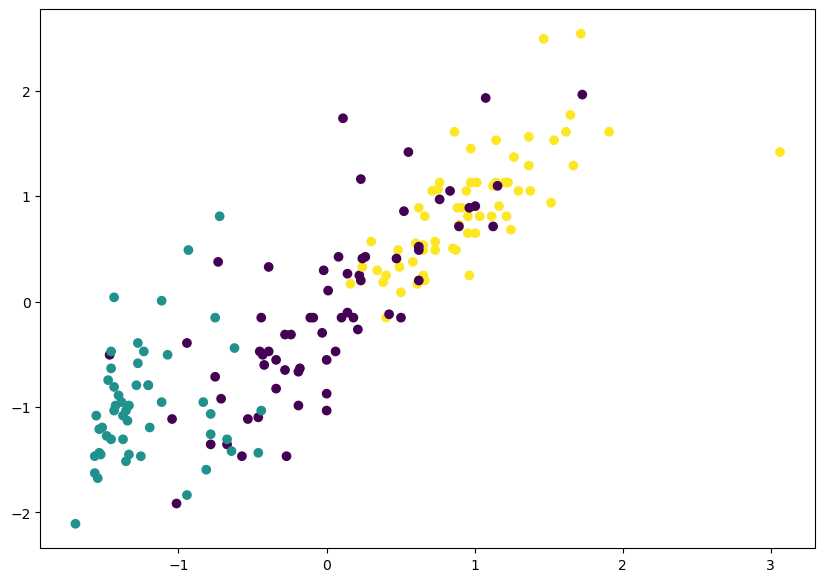

In [13]:
kmean =KMeans(n_clusters= 3, init= 'k-means++')
kmean.fit_predict(scaled_data)
plt.figure(figsize=(10,7))
plt.scatter(scaled_df['Flavanoids'], scaled_df['Total_Phenols'], c= kmean.labels_)
plt.show()

## With PCA

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 2)
wine_pca = pca.fit_transform(scaled_df)
wine_pca = pd.DataFrame(wine_pca, columns = ['PCA_1', 'PCA_2'])

In [22]:
kmean_pca = KMeans(n_clusters= 3, init='k-means++')

wine_pca['Cluster'] = kmean_pca.fit_predict(wine_pca)
wine_pca

,PCA_1,PCA_2,Cluster
0,3.316751,-1.443463,1
1,2.209465,0.333393,1
2,2.516740,-1.031151,1
3,3.757066,-2.756372,1
4,1.008908,-0.869831,1
...,...,...,...
173,-3.370524,-2.216289,0
174,-2.601956,-1.757229,0
175,-2.677839,-2.760899,0
176,-2.387017,-2.297347,0


In [18]:
import seaborn as sns

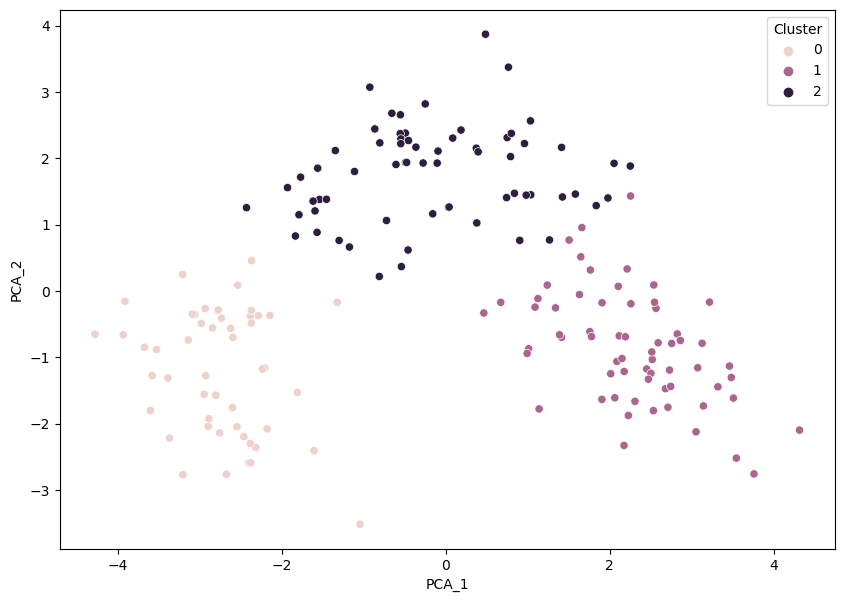

In [23]:
plt.figure(figsize=(10,7))
sns.scatterplot(data = wine_pca , x= 'PCA_1', y = 'PCA_2', hue = 'Cluster')
plt.show()

#### Now we have a better plot

In [37]:
from sklearn.metrics import silhouette_score
kmean_score = silhouette_score(wine_pca, wine_pca['Cluster'] )

In [38]:
kmean_score

0.600142750731804

## Agglomerative Clustering

In [26]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

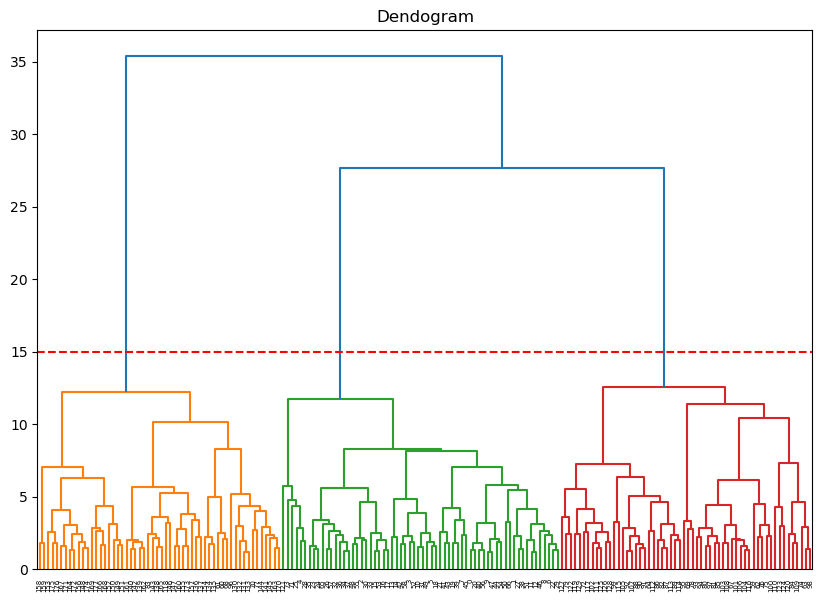

In [28]:
plt.figure(figsize=(10, 7))
plt.title('Dendogram')
dend = shc.dendrogram(shc.linkage(scaled_df, method= 'ward' ))
plt.axhline(y =15,color = 'r', linestyle = '--')


In [29]:
ac = AgglomerativeClustering(n_clusters= 3, affinity = 'euclidean', linkage= 'ward')
ac.fit_predict(scaled_df)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

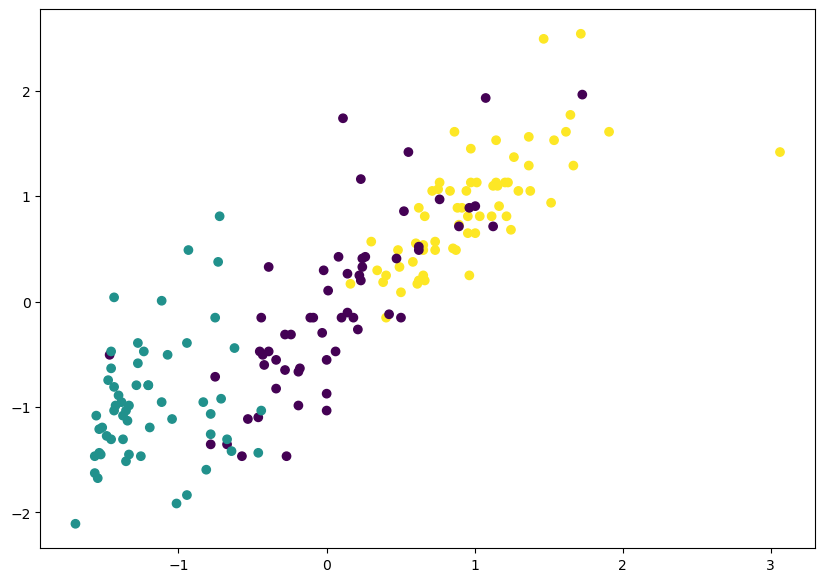

In [30]:
plt.figure(figsize=(10,7))
plt.scatter(scaled_df['Flavanoids'], scaled_df['Total_Phenols'], c= ac.labels_)
plt.show()

In [34]:
score = silhouette_score(scaled_data, ac.labels_)

In [35]:
score

0.2774439826952265

## With PCA

In [24]:
pca_ag = PCA(n_components= 2)
wine_pca_ag = pca_ag.fit_transform(scaled_df)
wine_pca_ag_df = pd.DataFrame(wine_pca_ag, columns= ['PCA_1','PCA_2'])

In [36]:
ag_pca = AgglomerativeClustering(n_clusters= 3, affinity= 'euclidean', linkage= 'ward')
wine_pca_ag_df['Cluster'] = ag_pca.fit_predict(wine_pca_ag_df)
wine_pca_ag_df

,PCA_1,PCA_2,Cluster
0,3.316751,-1.443463,2
1,2.209465,0.333393,2
2,2.516740,-1.031151,2
3,3.757066,-2.756372,2
4,1.008908,-0.869831,2
...,...,...,...
173,-3.370524,-2.216289,1
174,-2.601956,-1.757229,1
175,-2.677839,-2.760899,1
176,-2.387017,-2.297347,1


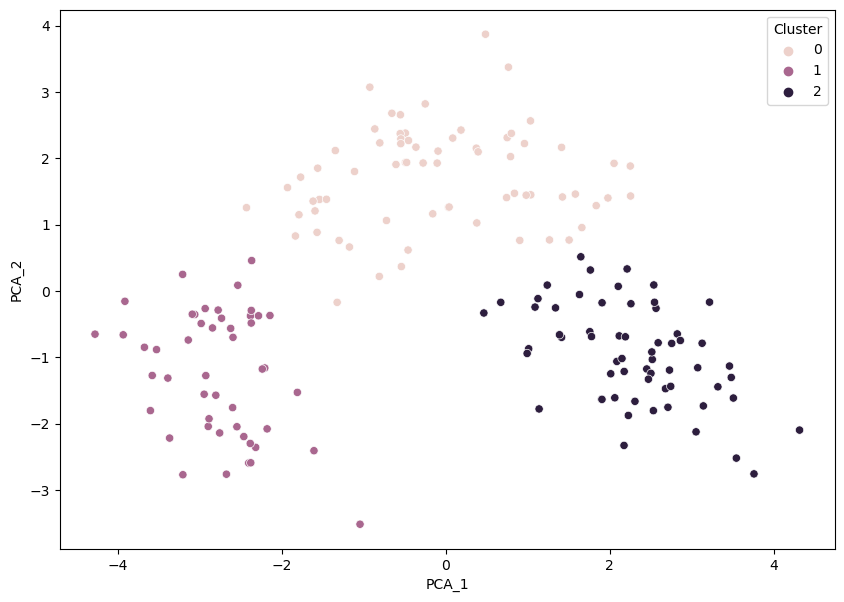

In [39]:
plt.figure(figsize=(10,7))
sns.scatterplot(data = wine_pca_ag_df , x= 'PCA_1', y = 'PCA_2', hue = 'Cluster')
plt.show()

In [45]:
pca_score = silhouette_score(wine_pca_ag_df, wine_pca_ag_df['Cluster'])
pca_score


0.6087331747224537

## DBSCAN

In [46]:
# letd take the value of minpoint to be 15 and find the value of epsilon

In [53]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=15)
neighbors_fit = neighbors.fit(scaled_df)
distances, indices = neighbors_fit.kneighbors(scaled_df)

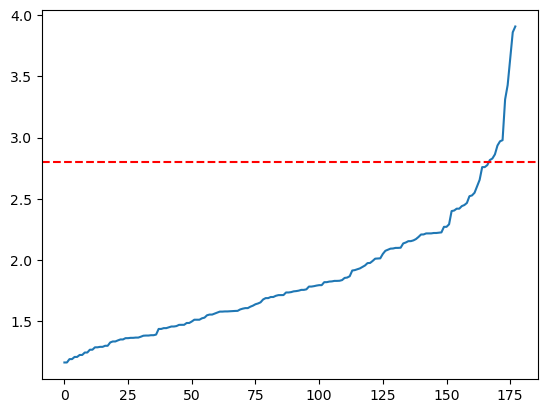

In [94]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.axhline(y = 2.8, color = 'r', linestyle = '--')

In [57]:
from sklearn.cluster import DBSCAN

In [95]:
db = DBSCAN(eps = 2.8, min_samples= 15)
db.fit(scaled_df)
labels = db.labels_

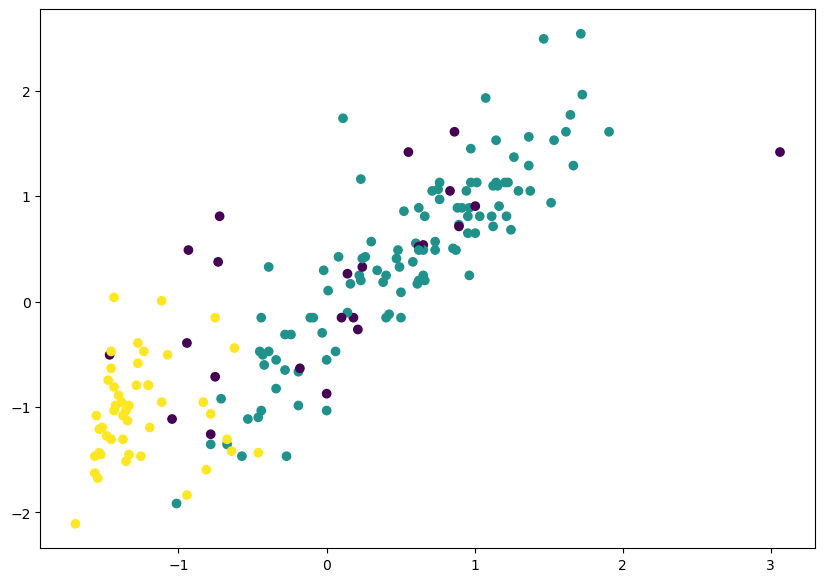

In [96]:
plt.figure(figsize=(10,7))
plt.scatter(scaled_df['Flavanoids'], scaled_df['Total_Phenols'], c= db.labels_)
plt.show()

In [97]:
db_score = silhouette_score(scaled_df, db.labels_)
db_score

0.2293698795539214

## With PCA

In [103]:
pca_db = PCA(n_components=2)
wine_db = pca_db.fit_transform(scaled_df)
wine_db_df = pd.DataFrame(wine_db, columns = ['PCA_1','PCA_2'])

In [127]:
neighbors = NearestNeighbors(n_neighbors=13)
neighbors_fit = neighbors.fit(wine_db_df)
distances, indices = neighbors_fit.kneighbors(wine_db_df)

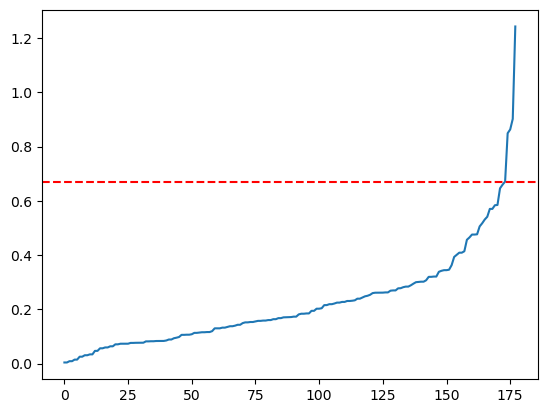

In [128]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.axhline(y = 0.67, color = 'r', linestyle = '--')

In [129]:
db_pca = DBSCAN(eps = 0.6, min_samples= 13)
wine_db_df['Cluster'] = db_pca.fit_predict(wine_db_df)
wine_db_df

,PCA_1,PCA_2,Cluster
0,3.316751,-1.443463,-1
1,2.209465,0.333393,-1
2,2.516740,-1.031151,0
3,3.757066,-2.756372,-1
4,1.008908,-0.869831,-1
...,...,...,...
173,-3.370524,-2.216289,-1
174,-2.601956,-1.757229,-1
175,-2.677839,-2.760899,-1
176,-2.387017,-2.297347,-1


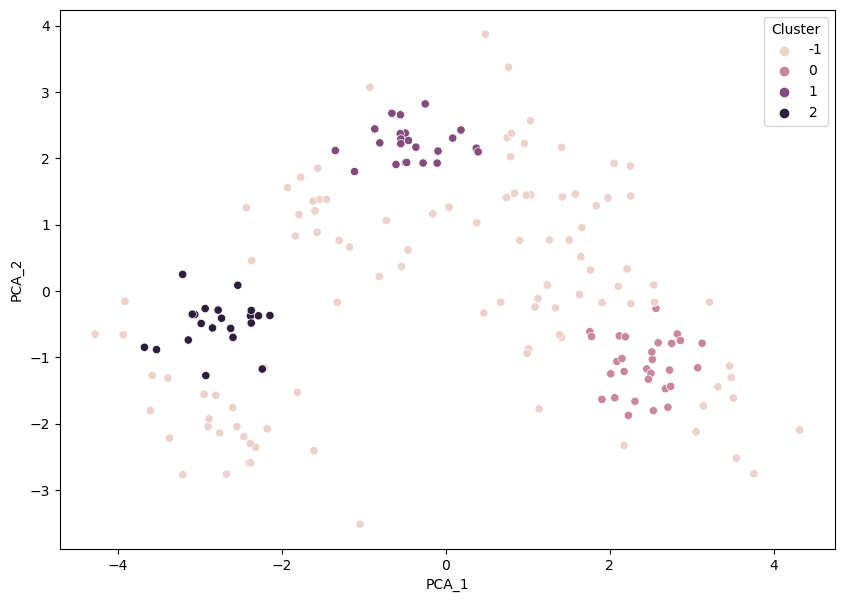

In [130]:
plt.figure(figsize=(10,7))
sns.scatterplot(data = wine_db_df , x= 'PCA_1', y = 'PCA_2', hue = 'Cluster')
plt.show()